In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(train_images.shape)
print(len(train_labels))
print(train_labels[:8]) #['ankle boot','T-shirt/top','T-shirt/Top','Dress','T-shirt/Top','Pullover','Sneaker','Pullover']
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 3 0 2 7 2]
(10000, 28, 28)
10000


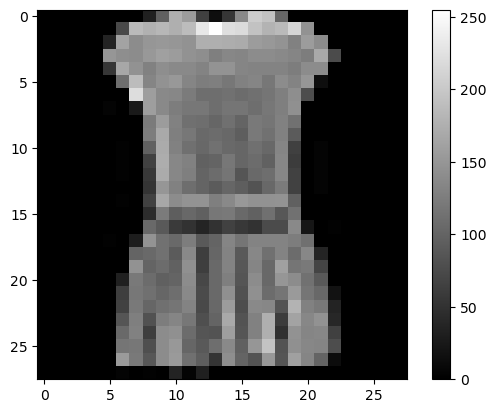

In [8]:
plt.figure()
plt.imshow(train_images[3],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#scaling ==> contributes to speeding up work.
train_images = train_images / 255.0
test_images = test_images /255.0

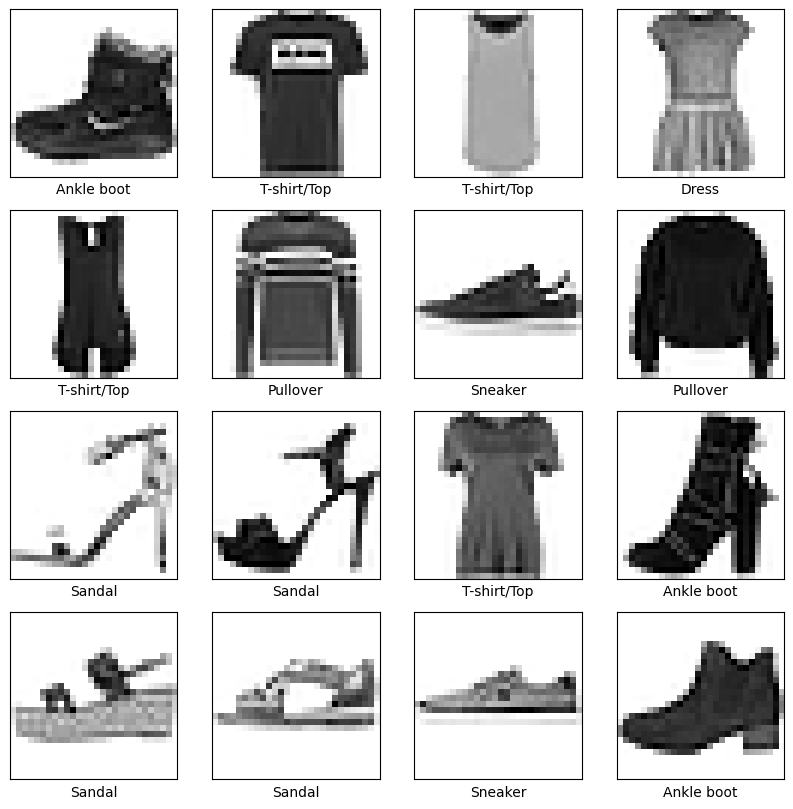

In [18]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',#difference between actual and probabilities
              metrics=['accuracy'])

In [25]:
model.fit(train_images,train_labels,epochs=7) #less epochs means UF, more epochs means OF

Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2656 - accuracy: 0.9016
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2450 - accuracy: 0.9092
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2376 - accuracy: 0.9115
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2286 - accuracy: 0.9161
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2203 - accuracy: 0.9183
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2161 - accuracy: 0.9199


In [26]:
train_images.shape

(60000, 28, 28)

In [29]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy: ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8876
Test accuracy:  0.8876000046730042


In [30]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[5.7153271e-12 9.4995095e-13 7.8581187e-12 2.9640734e-11 1.4871840e-11
 1.5935062e-03 1.3047347e-08 1.1633767e-03 4.2973242e-10 9.9724317e-01]
9
9


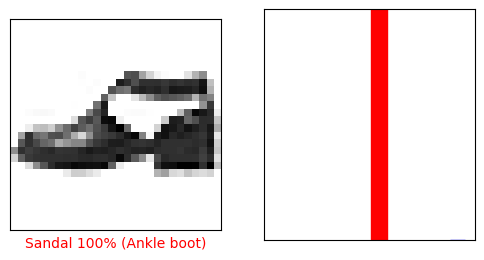

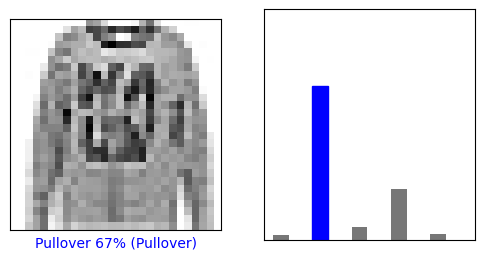

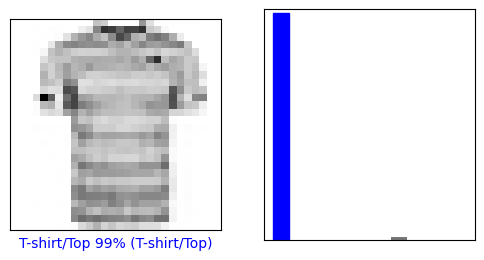

In [54]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
i=23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

i = 500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()


i=35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

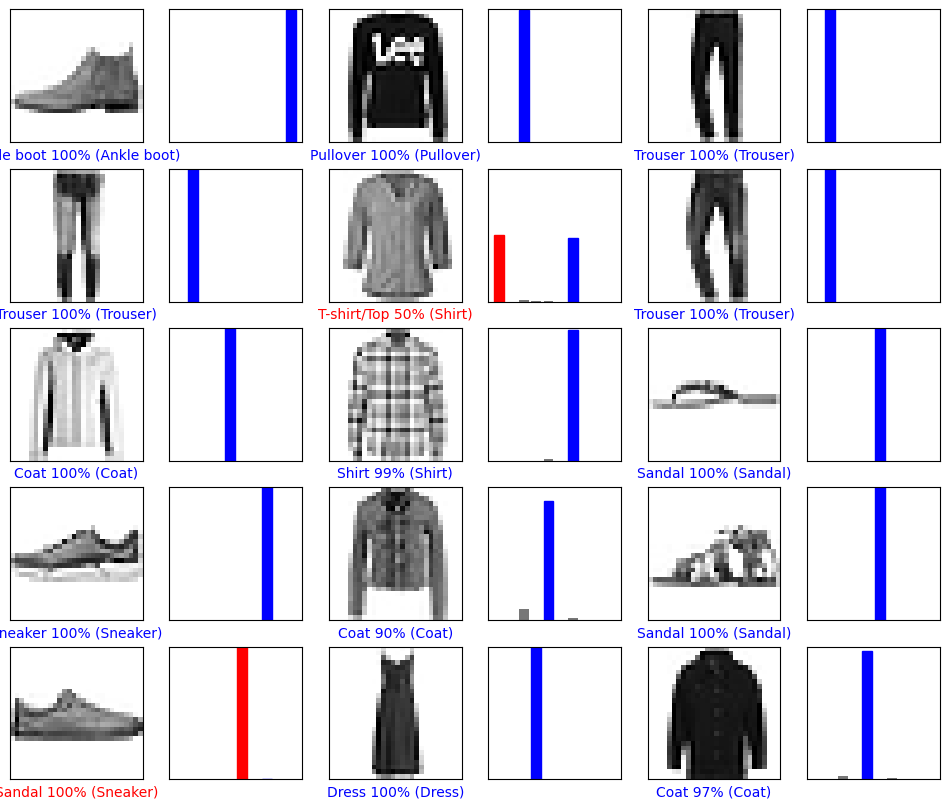

(28, 28)


In [55]:
#plot the first X test images, their predicted label, and the true label
#Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
    
plt.show()    

#grab an image from the test dataset
img = test_images[0]


print(img.shape)

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 28, 28, 1)
1/1 [==============================] - 0s 37ms/step
[[5.7153271e-12 9.4995095e-13 7.8581031e-12 2.9640734e-11 1.4871783e-11
  1.5935062e-03 1.3047347e-08 1.1633779e-03 4.2973322e-10 9.9724317e-01]]


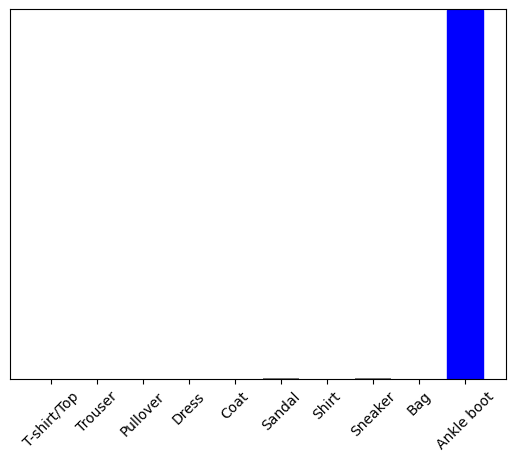

9


In [69]:
#add the image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0,predictions_single,test_labels)
plt.xticks(range(10),class_names,rotation=45)
plt.show()

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)